In [190]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [191]:
path = r"C:\Users\Yucheng\Documents\Thesis\MastersThesis\reports\Logs\C_NaiveWide\CIFAR10\C_NaiveWide.npz"
NPZ = np.load(path) 
print(NPZ.files)

['predictions', 'confidences', 'full_confidences', 'correct_preds', 'targets_matrix', 'brier_score', 'NLL']


In [192]:
NPZ['full_confidences'].shape

(5, 10000, 10, 4)

In [205]:
def compute_disagreement(subnetwork_predictions):
    n_samples = subnetwork_predictions.shape[0]
    n_subnetworks = subnetwork_predictions.shape[1]

    # Compute the disagreement between all pairs of subnetworks
    disagreement_matrix = np.zeros((n_subnetworks, n_subnetworks))
    for i in range(n_subnetworks):
        for j in range(n_subnetworks):
            if i != j:
                disagreement_matrix[i, j] = (subnetwork_predictions[:, i] != subnetwork_predictions[:, j]).float().mean().item()
    
    disagreement = 1/(n_subnetworks * (n_subnetworks -1))*disagreement_matrix.sum()

    return disagreement

def compute_KL_divergence(checkpoint):
    n_samples = checkpoint.shape[0]
    n_subnetworks = checkpoint.shape[2]

    # Compute the KL divergence between all pairs of subnetworks
    KL_divergence_matrix = np.zeros((n_subnetworks, n_subnetworks))
    for i in range(n_subnetworks):
        for j in range(n_subnetworks):
            if i != j:
                KL_divergence_matrix[i, j] = torch.nn.functional.kl_div(checkpoint[:,:, i], checkpoint[:, :, j], reduction='mean', log_target=True).item()
    
    average_divergence = 1/(n_subnetworks * (n_subnetworks -1)) * KL_divergence_matrix.sum()

    return average_divergence


In [206]:
def make_barplot(checkpoint, subnetworks):

    # Calculate the average of all log probabilities
    avg_log_probs = torch.exp(checkpoint).mean(dim=0).cpu().detach().numpy()
    colours = ['r','g','b','m','c']

    fig, ax = plt.subplots()

    X = np.arange(len(avg_log_probs))

    # Repeat the process three times

    # Plot the bar plot with semitransparent bars

    for i in range(subnetworks):
        ax.bar(X + 0.15*i - (subnetworks//2)*0.15, avg_log_probs[:,i], alpha=1, color=colours[i], label=f'Subnetwork {i+1}', width=0.15)
    
    # Add the legend
    plt.legend()
    plt.xlabel("Classes")
    plt.xticks(X)
    plt.ylabel("Confidence")

    # Show the plot
    plt.show()

# Naive

In [207]:
checkpoint_path = r"C:\Users\Yucheng\Documents\Thesis\MastersThesis\models\classification\checkpoints\C_NaiveWide\CIFAR10\M3\C_NaiveWide_28_10_3_members_rep1_checkpoints.pt"
checkpoint = torch.load(checkpoint_path)    

In [208]:
checkpoint = checkpoint[-1]

In [209]:
checkpoint.shape

torch.Size([256, 10, 3])

In [210]:
subnetwork_predictions = checkpoint.argmax(dim=1)
compute_disagreement(subnetwork_predictions)

0.0

In [211]:
compute_KL_divergence(checkpoint)

2.142260176659268e-08

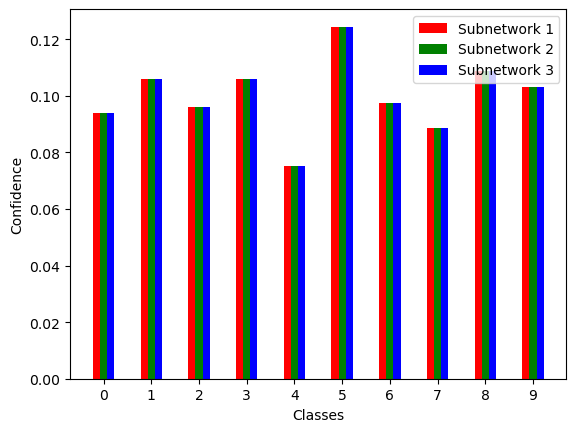

In [212]:
make_barplot(checkpoint, subnetworks=3)

# MIMO

In [213]:
checkpoint_path = r"C:\Users\Yucheng\Documents\Thesis\MastersThesis\models\classification\checkpoints\C_MIMOWide\CIFAR10\M3\C_MIMOWide_28_10_3_members_rep1_checkpoints.pt"
checkpoint = torch.load(checkpoint_path)    

In [214]:
checkpoint = checkpoint[-1]

In [215]:
subnetwork_predictions = checkpoint.argmax(dim=1)
compute_disagreement(subnetwork_predictions)

0.12369791666666666

In [216]:
np.mean([0.1328125, 0.12890625,0.109375]) 

0.12369791666666667

In [217]:
compute_KL_divergence(checkpoint)

0.0426648153613011

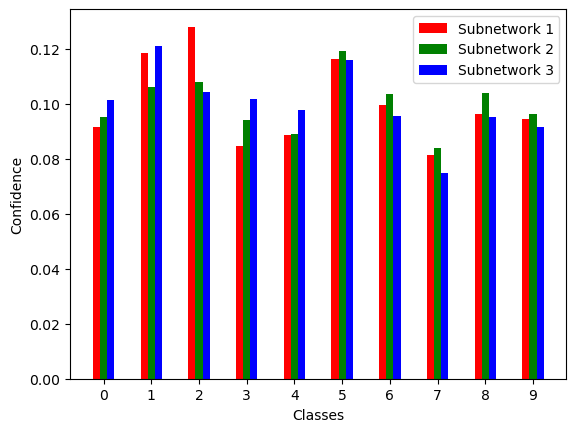

In [218]:
make_barplot(checkpoint, subnetworks=3)

# MIMBO

In [219]:
checkpoint_path = r"C:\Users\Yucheng\Documents\Thesis\MastersThesis\models\classification\checkpoints\C_MIMBOWide\CIFAR10\M3\C_MIMBOWide_28_10_3_members_rep1_checkpoints.pt"
checkpoint = torch.load(checkpoint_path)  

In [220]:
checkpoint = checkpoint[-1]


In [221]:
subnetwork_predictions = checkpoint.argmax(dim=1)
compute_disagreement(subnetwork_predictions)

0.14583333333333331

In [222]:
compute_KL_divergence(checkpoint)

0.04147887912889321

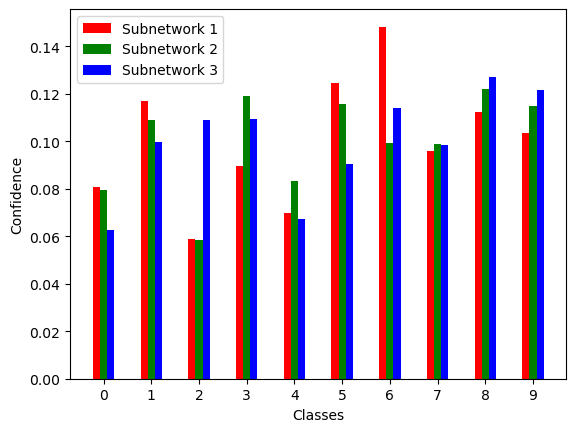

In [223]:
make_barplot(checkpoint, subnetworks=3)
